## Multiple Inputs

In [1]:
from typing import Dict, TypedDict, List
from langgraph.graph import StateGraph

/Users/zakwanzahid/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
#State Schema
class AgentState(TypedDict):
    values: List[int]
    name: str
    result: str

In [14]:
def process_values(state: AgentState) -> AgentState:
    """ Function handles multiple different inputs"""

    print(state)

    state["result"]  = f"Hi there {state['name']}, the sum of your values is {sum(state['values'])}"

    print(state)

    return state

In [16]:
graph = StateGraph(AgentState)

graph.add_node("processor", process_values)
graph.set_entry_point("processor")
graph.set_finish_point("processor")

app = graph.compile()

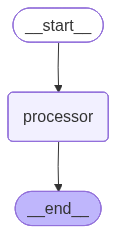

In [17]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [20]:
answers =  app.invoke({"name": "Zakwanzahid", "values": [1,2,3,4,5]})

{'values': [1, 2, 3, 4, 5], 'name': 'Zakwanzahid'}
{'values': [1, 2, 3, 4, 5], 'name': 'Zakwanzahid', 'result': 'Hi there Zakwanzahid, the sum of your values is 15'}


In [21]:
print(answers["result"])

Hi there Zakwanzahid, the sum of your values is 15


## Second

In [ ]:

class AgentState(TypedDict):
    values: List[int]
    name: str
    operation: str   # "+" or "*"
    result: str


In [25]:
def process_values(state: AgentState) -> AgentState:
    values = state["values"]
    op = state["operation"]
    name = state["name"]

    # Perform operation
    if op == "+":
        answer = sum(values)
    elif op == "*":
        answer = 1
        for v in values:
            answer *= v
    else:
        answer = "Invalid operation"

    # Store final result in state
    state["result"] = f"hi {name}, your answer is {answer}"

    return state


In [30]:
graph = StateGraph(AgentState)

graph.add_node("matho", process_values)
graph.set_entry_point("matho")
graph.set_finish_point("matho")

app = graph.compile()

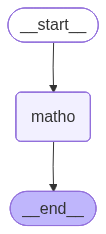

In [31]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [34]:
answers = app.invoke({
    "name": "jack",
    "values": [1,2,3,4],
    "operation": "+",
    "result": ""
})


In [35]:
print(answers["result"])


hi jack, your answer is 10
